___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression with Python

** This is mostly just code for reference. Please watch the video lecture for more info behind all of this code.**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

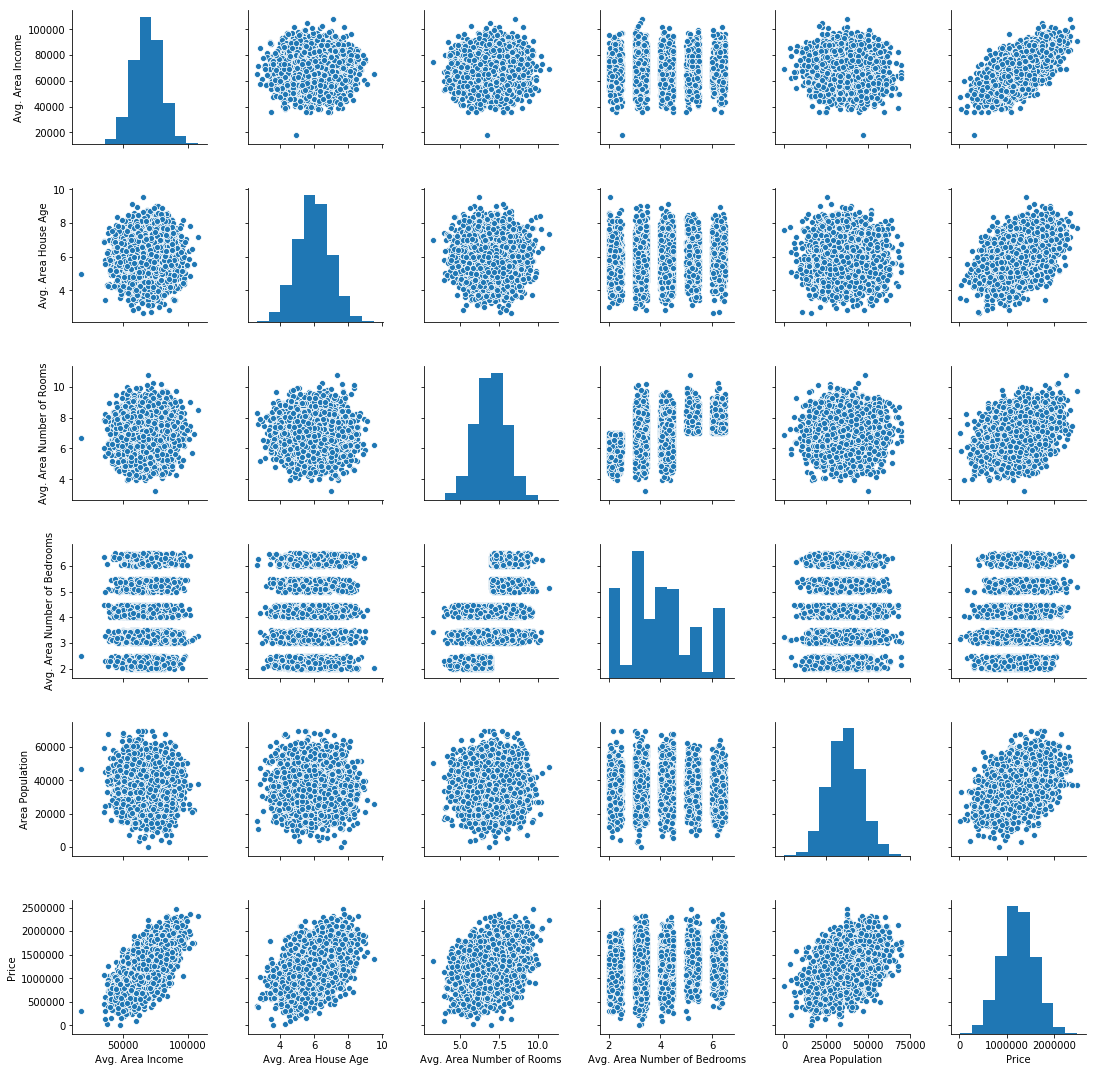

In [7]:
sns.pairplot(USAhousing)

/home/benitez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


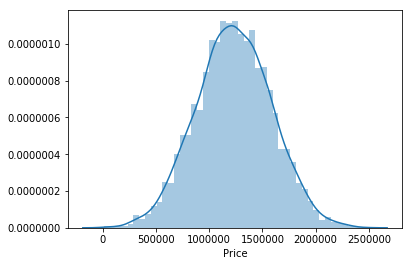

In [8]:
sns.distplot(USAhousing['Price'])

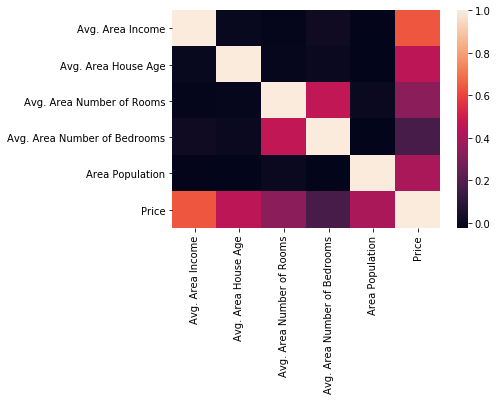

In [9]:
sns.heatmap(USAhousing.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [28]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
5       1.068138e+06
6       1.502056e+06
7       1.573937e+06
8       7.988695e+05
9       1.545155e+06
10      1.707046e+06
11      6.637324e+05
12      1.042814e+06
13      1.291332e+06
14      1.402818e+06
15      1.306675e+06
16      1.556787e+06
17      5.284852e+05
18      1.019426e+06
19      1.030591e+06
20      2.146925e+06
21      9.292476e+05
22      7.188872e+05
23      7.439998e+05
24      8.957371e+05
25      1.453975e+06
26      1.125693e+06
27      9.754295e+05
28      1.240764e+06
29      1.577018e+06
            ...     
4970    1.120943e+06
4971    1.111307e+06
4972    1.736402e+06
4973    1.340770e+06
4974    8.013486e+05
4975    1.324382e+06
4976    1.340344e+06
4977    1.518478e+06
4978    1.910585e+06
4979    1.823498e+06
4980    1.406865e+06
4981    1.203850e+06
4982    1.020096e+06
4983    1.194357e+06
4984    1.211900e+06
4985    1.378938e+06
4986    1.260

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1303      68091.179676             5.364208                   7.502956   
1051      75729.765546             5.580599                   7.642973   
4904      70885.420819             6.358747                   7.250241   
931       73386.407340             4.966360                   7.915453   
4976      75046.313791             5.351169                   7.797825   
3069      35454.714659             6.855708                   6.018647   
2650      60749.234269             6.465123                   6.168514   
1962      74756.932531             6.784282                   6.738385   
4842      65273.044870             6.107499                   8.561687   
864       72332.058260             5.744598                   6.869613   
3638      73380.642380             5.995934                   7.067590   
3090      69603.690657             7.433065                   5.097025   
1737      72727.225792             6.024013                   5.660724   
10        80527.472083             8.093513                   5.042747   
1397      55435.643780             5.134473                   7.882091   
3447      73092.741315             5.615460                   6.524657   
2494      64912.515462             7.186099                   6.028782   
4286      61506.594775             6.411062                   6.701059   
1046      70775.434884             6.131733                   6.909075   
3440      67785.932985             5.154518                   5.680143   
2621      69421.032417             7.798759                   6.858556   
631       70836.011346             7.071295                   5.988527   
2979      59539.412399             6.305096                   7.866082   
4543      84556.636265             5.092459                   6.723412   
1644      74826.305562             5.505002                   7.399878   
1809      58660.892412             7.600071                   6.797173   
1773      64427.374368             4.751360                   6.394383   
4365      69845.238187             5.591788                   7.736606   
4160      58547.886965             6.865313                   7.356240   
4560      64975.662830             5.037142                   6.710464   
...                ...                  ...                        ...   
3529      66889.099406             7.079594                   5.153575   
1527      66300.505283             6.671580                   8.282587   
343       76245.218475             7.955767                   7.826125   
3807      85683.855951             6.597539                   5.464265   
3978      49055.281862             7.740134                   9.266827   
2323      67557.221850             6.036130                   6.193835   
1273      74622.164347             7.481985                   6.059717   
3912      78199.455011             5.097763                   6.163615   
1580      68985.152738             5.754109                   8.382275   
2107      61676.734923             6.118452                   8.539962   
2931      65256.139228             6.538229                   6.895255   
1949      72121.324562             5.006415                   8.215413   
4467      81947.838320             7.470063                   6.122909   
2184      64059.442475             5.789114                   5.935699   
1530      85175.200626             7.750852                   7.271163   
4719      78778.316902             5.964358                   6.151416   
49        86754.196629             6.604440                   6.252455   
4573      62036.631130             5.535461                   7.911091   
908       80000.764172             5.612802                   5.910013   
3182      82353.289231             6.324068                   6.771239   
4828      83875.559870             7.243607                   8.522705   
3829      72969.673322             4.829483                   7.808808   
2623      

## Creating and Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [16]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [31]:
predictions = lm.predict(X_test)
type (X_test)

pandas.core.frame.DataFrame

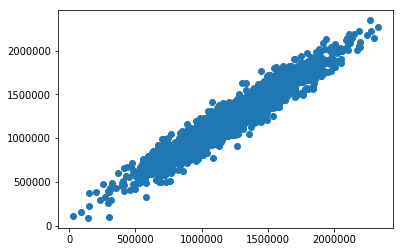

In [19]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/home/benitez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


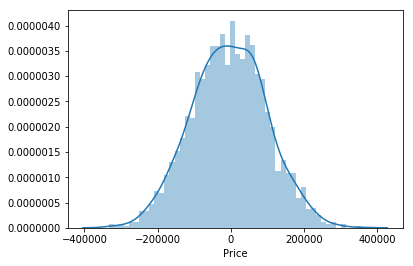

In [20]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 

Up next is your own Machine Learning Project!

## Great Job!